<a href="https://colab.research.google.com/github/llarse/solarEff/blob/main/CLMatSciDataResearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up / Imports


In [ ]:
import pandas as pd
import numpy as np
import re #regex library
import seaborn as sns

from matplotlib.pyplot import style
style.use('seaborn') #prettier
%matplotlib inline


In [ ]:
!pip install jarvis-tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 962 kB 6.6 MB/s 
     |████████████████████████████████| 514 kB 47.2 MB/s 


Import Data

In [ ]:
from jarvis.db.figshare import data

dft_3d = data('dft_3d')
dft_2d = data('dft_2d')

Obtaining 3D dataset 55k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1


100%|██████████| 31.9M/31.9M [00:02<00:00, 10.8MiB/s]


Loading the zipfile...
Loading completed.
Obtaining 2D dataset 1.1k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1


100%|██████████| 8.20M/8.20M [00:01<00:00, 5.93MiB/s]


Loading the zipfile...
Loading completed.


Packages

Defining DataFrames

In [ ]:
df=pd.DataFrame(dft_3d)
#df2=pd.DataFrame(dft_2d)

#  Initial Data checking

3D Set

In [ ]:
print(df.shape)
print (df.columns, len(df.columns))
cols = [6,8,59]


(55723, 63)
Index(['jid', 'spg_number', 'spg_symbol', 'formula',
       'formation_energy_peratom', 'func', 'optb88vdw_bandgap', 'atoms',
       'slme', 'magmom_oszicar', 'spillage', 'elastic_tensor',
       'effective_masses_300K', 'kpoint_length_unit', 'maxdiff_mesh',
       'maxdiff_bz', 'encut', 'optb88vdw_total_energy', 'epsx', 'epsy', 'epsz',
       'mepsx', 'mepsy', 'mepsz', 'modes', 'magmom_outcar', 'max_efg',
       'avg_elec_mass', 'avg_hole_mass', 'icsd', 'dfpt_piezo_max_eij',
       'dfpt_piezo_max_dij', 'dfpt_piezo_max_dielectric',
       'dfpt_piezo_max_dielectric_electronic',
       'dfpt_piezo_max_dielectric_ionic', 'max_ir_mode', 'min_ir_mode',
       'n-Seebeck', 'p-Seebeck', 'n-powerfact', 'p-powerfact', 'ncond',
       'pcond', 'nkappa', 'pkappa', 'ehull', 'dimensionality', 'efg',
       'xml_data_link', 'typ', 'exfoliation_energy', 'spg', 'crys', 'density',
       'poisson', 'raw_files', 'nat', 'bulk_modulus_kv', 'shear_modulus_gv',
       'mbj_bandgap', 'hse_gap',

In [ ]:
df.head()

jid spg_number spg_symbol   formula  formation_energy_peratom  \
0  JVASP-90856        129     P4/nmm  TiCuSiAs                  -0.42762   
1  JVASP-86097        221      Pm-3m      DyB6                  -0.41596   
2  JVASP-64906        119      I-4m2   Be2OsRu                   0.04847   
3  JVASP-98225         14     P2_1/c       KBi                  -0.44140   
4     JVASP-10        164      P-3m1      VSe2                  -0.71026   

        func  optb88vdw_bandgap  \
0  OptB88vdW              0.000   
1  OptB88vdW              0.000   
2  OptB88vdW              0.000   
3  OptB88vdW              0.472   
4  OptB88vdW              0.000   

                                               atoms slme magmom_oszicar  ...  \
0  {'lattice_mat': [[3.566933224304235, 0.0, -0.0...   na            0.0  ...   
1  {'lattice_mat': [[4.089078911208881, 0.0, 0.0]...   na            0.0  ...   
2  {'lattice_mat': [[-1.833590720595598, 1.833590...   na            0.0  ...   
3  {'lattice_mat': [[7.2963518353359165, 0.0, 0.0...   na            0.0  ...   
4  {'lattice_mat': [[1.6777483798834445, -2.90594...   na            0.0  ...   

  density poisson                                          raw_files nat  \
0   5.956      na                                                 []   8   
1   5.522      na  [OPT-LOPTICS,JVASP-86097.zip,https://ndownload...   7   
2  10.960      na  [OPT-LOPTICS,JVASP-64906.zip,https://ndownload...   4   
3   5.145      na                                                 []  32   
4   5.718    0.23  [FD-ELAST,JVASP-10.zip,https://ndownloader.fig...   3   

  bulk_modulus_kv shear_modulus_gv mbj_bandgap  hse_gap  \
0              na               na          na       na   
1              na               na          na       na   
2              na               na          na       na   
3              na               na          na       na   
4           48.79            33.05         0.0       na   

               reference        search  
0             mp-1080455  -As-Cu-Si-Ti  
1              mp-568319         -B-Dy  
2  auid-3eaf68dd483bf4f4     -Be-Os-Ru  
3               mp-31104         -Bi-K  
4                 mp-694         -Se-V  

[5 rows x 63 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55723 entries, 0 to 55722
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   jid                                   55723 non-null  object 
 1   spg_number                            55723 non-null  object 
 2   spg_symbol                            55723 non-null  object 
 3   formula                               55723 non-null  object 
 4   formation_energy_peratom              55723 non-null  float64
 5   func                                  55723 non-null  object 
 6   optb88vdw_bandgap                     55723 non-null  float64
 7   atoms                                 55723 non-null  object 
 8   slme                                  55723 non-null  object 
 9   magmom_oszicar                        55723 non-null  object 
 10  spillage                              55723 non-null  object 
 11  elastic_tensor 

In [ ]:
df.describe()

formation_energy_peratom  optb88vdw_bandgap  optb88vdw_total_energy  \
count              55723.000000       55723.000000            55723.000000   
mean                  -0.832323           0.688614               -3.213633   
std                    1.081827           1.409721                2.131508   
min                   -4.423040           0.000000              -10.500270   
25%                   -1.546755           0.000000               -4.851125   
50%                   -0.563170           0.000000               -3.278480   
75%                   -0.111650           0.606000               -1.582445   
max                    4.985750           9.643000                3.393500   

            density           nat  
count  55723.000000  55723.000000  
mean       6.221484      9.958940  
std        3.115907      8.968909  
min        0.000000      1.000000  
25%        3.965000      4.000000  
50%        5.656000      6.000000  
75%        7.970000     13.000000  
max       24.266000    140.000000

In [ ]:
#df['nat'] = pd.to_numeric(df['nat']) to change the data types into feature variables

Saving to CSV

In [ ]:
df.to_csv('dtf3d')

Cleaning Data

In [ ]:
#df['slme']=df['slme'].replace('na',np.nan).dropna().values,dtype='float')

In [ ]:
polyData = data('polymer_genome')
df3=pd.DataFrame(polyData)

Obtaining Polymer genome 1k...
Reference:https://www.nature.com/articles/sdata201612
Loading the zipfile...
Loading completed.


In [ ]:
print(df3.shape)
df3.head()

In [ ]:
df3.columns

Index(['atoms', 'method', 'id', 'src', 'label', 'vol', 'atom_en', 'hse_gap',
       'gga_gap', 'diel_tot', 'diel_ion', 'diel_elec'],
      dtype='object')

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
from pandas_profiling import ProfileReport
#newdf = df3.select_dtypes(include=['float64'])
#profile = ProfileReport(newdf)

#profile = newdf.profile_report(title="report")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
profile



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:

profile2 = ProfileReport(df, title = "report")
profile2

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
newdf = df.iloc[:,cols]

newdf.head()
print(newdf.shape)

(55723, 3)


In [ ]:
#dropping na and correcting for mbj not dropping
newdf = newdf.dropna(how='any',axis=0)

newdf = newdf[newdf.slme.isin(['na']) == False]

newdf = newdf[newdf.mbj_bandgap.isin(['na']) == False]

print(newdf.shape)
newdf['mbj_bandgap'] = newdf['mbj_bandgap'].astype(float)
newdf['slme'] = newdf['slme'].astype(float)
#from pandas_profiling import ProfileReport
#prof = ProfileReport(newdf)
#prof

(8460, 3)


In [ ]:
fdf = newdf
fdf.corr()


optb88vdw_bandgap      slme  mbj_bandgap
optb88vdw_bandgap           1.000000 -0.641304     0.899201
slme                       -0.641304  1.000000    -0.639585
mbj_bandgap                 0.899201 -0.639585     1.000000

In [ ]:
fdf.to_csv('cleaned.csv')

# Feature Engineering and Model development


In [ ]:
fdf = pd.read_csv('cleaned.csv')
print(fdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8460 entries, 0 to 8459
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         8460 non-null   int64  
 1   optb88vdw_bandgap  8460 non-null   float64
 2   slme               8460 non-null   float64
 3   mbj_bandgap        8460 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 264.5 KB
None


Import RF and set up data

In [ ]:
fdf.head()
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8460 entries, 0 to 8459
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         8460 non-null   int64  
 1   optb88vdw_bandgap  8460 non-null   float64
 2   slme               8460 non-null   float64
 3   mbj_bandgap        8460 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 264.5 KB


In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split #switch to kFlip?
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

x88data = fdf['optb88vdw_bandgap'].values #independent: optb88vdw_bandgap
xmbjdata = fdf['mbj_bandgap'].values #independent 2: mbj_bandgap

yvalues = fdf['slme'].values #dependent: Solar efficiency; named values to prevent issues w/ function


RF function

In [ ]:
def  Regressor(Xdata, ydata, split, isvdw): #split = % to be saved for testing
  
  
  isvdw = False
  
  if isvdw:
    removed = []
    r = len(ydata) - 1
    print(r)
    for i in range(6527):
      if(ydata[i]<0.01):
        removed.append(i)
        ydata = np.delete(ydata, i)
        Xdata = np.delete(Xdata, i)

  Xdata = Xdata.reshape(-1,1)
  ydata = ydata.reshape(-1,1)
  X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=split, random_state=42)
  regr = RandomForestRegressor(max_depth = 12, random_state = 33)
  #print(X_train)
  
  regr.fit(X_train, y_train)
  
  mlpr = MLPRegressor(hidden_layer_sizes=(400,400),shuffle=True,max_iter=2000)
  mlpr.fit(X_train, y_train)
  mlp_fit = mlpr.predict(X_test)
  #score the prediction on the test set - this is a metric for how "good" the prediction is
  print(mlpr.score(X_test,y_test))
  print(regr.score(X_test,y_test))

  #predict all of the formation energies based on the composition only
  y_fit = regr.predict(X_test)

  #packaged = [regr, X_test, y_test]
  return regr, mlpr, y_test, y_fit, mlp_fit

Doing the regressions

In [ ]:
regr88, mlp88, ytest1, yfit1, mfit1 = Regressor(x88data, yvalues, 0.3, True) # 30% reserved for testing
regrmbj,mlpmbj, ytest2, yfit2, mfit2 = Regressor(xmbjdata, yvalues, 0.3, False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6904030666134844
0.6670119147761763


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.999821144617405
0.9999231841274523


In [ ]:
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_error
print("RandomForestRegressor r2 score: ", r2_score(ytest1, yfit1))
print("RandomForestRegressor Explained Variance: ", explained_variance_score(ytest1, yfit1))
print("MLP r2 score: ", r2_score(ytest1, mfit1))
print("MLP Explained Variance: ", explained_variance_score(ytest1, mfit1))
print("============================================")
print("RandomForestRegressor r2 score: ", r2_score(ytest2, yfit2))
print("RandomForestRegressor Explained Variance: ", explained_variance_score(ytest2, yfit2))
print("MLP r2 score: ", r2_score(ytest2, mfit2))
print("MLP Explained Variance: ", explained_variance_score(ytest2, mfit2))


RandomForestRegressor r2 score:  0.6670119147761763
RandomForestRegressor Explained Variance:  0.6670324593994195
MLP r2 score:  0.6942623693563474
MLP Explained Variance:  0.6943451719566157
RandomForestRegressor r2 score:  0.9999231841274523
RandomForestRegressor Explained Variance:  0.9999232030173486
MLP r2 score:  0.9998151161861204
MLP Explained Variance:  0.9998152531852759


# Visualization

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

def plot(y_test, y_fit, mlp_fit, num):
  c1 = '#17BEBB' #turqoise
  c1 = '#DB5461' #red
  c2 = '#556d96'
  plt.figure(figsize=(10,10))
  #plt.scatter(y_test,y_fit, marker = 'x',  label = 'RF')
  plt.scatter(y_test,y_fit, marker = 'x',  label = 'RF', color = c1)
  #plt.scatter(y_test, mlp_fit, marker = 'o', label = 'mlp')
  plt.scatter(y_test, mlp_fit, marker = 'o', label = 'mlp', color = c2)
  plt.plot([-4,34],[-4,34],'k',lw=2)

  plt.xlabel('DFT SLME %',fontsize=14)
  plt.ylabel('Predicted SLME %',fontsize=14)
  plt.legend(fontsize=15)
  #plt.savefig('graphs' + num + '.png')

[1.37013355e-03 4.42862396e+00 2.06763300e+01 ... 5.60277048e+00
 2.82050686e-01 2.82725919e+01]


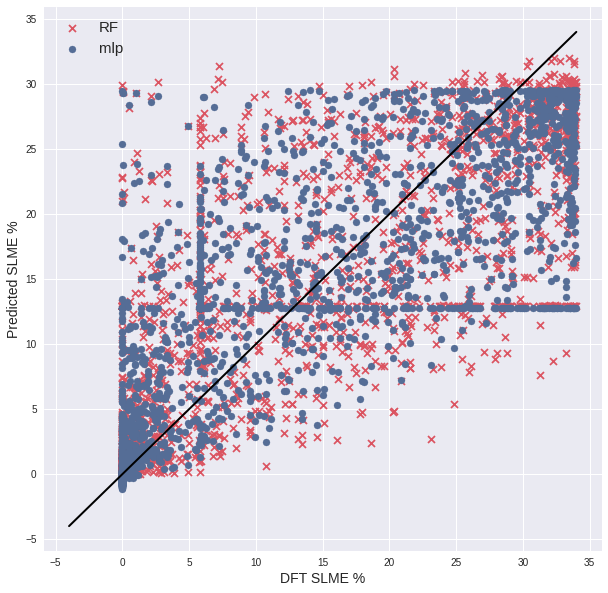

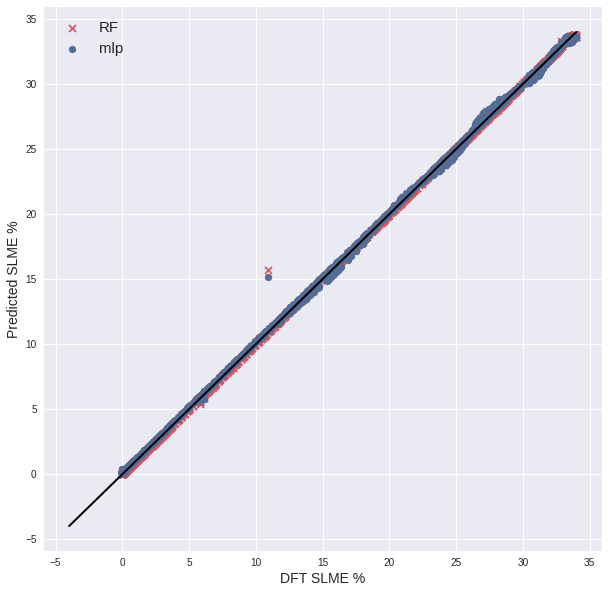

In [ ]:
plot(ytest1, yfit1, mfit1) #deviation from VDW not fitting semiconductors well
print(yfit1)
plot(ytest2, yfit2, mfit2)

In [ ]:
testX = [[0.751],[.526]] #GaAs, CdTe
#testX = testX.reshape(-1,1)
testSLME = regrmbj.predict(testX)
print(testSLME)

[25.40716667 16.5326    ]
